In [1]:
import pandas as pd
import numpy as np
from tools import seq_to_num, acc_score, prep_submit
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("../data/train.csv", index_col=0)
df_test = pd.read_csv('../data/test.csv', index_col=0)

In [3]:
train_bins = seq_to_num(df_train.Sequence, nbins=7, dtype=np.float32, bins_by='val')
test_bins = seq_to_num(df_test.Sequence, nbins=1, dtype=np.float32, bins_by='val', pad=False)

Using TensorFlow backend.
/Users/ptyshevs/envs/loc_env/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [36]:
X_one = train_bins[0][0][:1][0]
y_one = train_bins[0][1][:1]

In [42]:
indices = np.array([_ for _ in range(X_one.shape[0])])

In [92]:
coef = np.polyfit(indices, X_one, deg=6)
poly = np.poly1d(coef)
ys_pred = poly(indices)

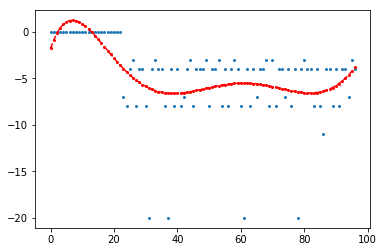

In [94]:
plt.scatter(indices, X_one , s=4)
plt.plot(indices, ys_pred, 'ro--', markersize=2)

In [100]:
X_one[-1]

-4.0

In [103]:
poly(95)

-4.257479501027612

In [75]:
def poly_predict(data, last=-1, max_deg=3, rnd=np.ceil, verbose=False):
    predictions = []
    for seq in data:
        if len(seq) == 0:
            predictions.append(0)
            continue
        best_deg = max_deg
        best_err = seq.max()
        indices = [_ for _ in range(1, len(seq) + 1)]
        for deg in range(1, min(max_deg + 1, len(seq))):
            coef = np.polyfit(indices[:-1], seq[:-1], deg=deg)
            poly = np.poly1d(coef)
            err = (poly(indices[-1]) - seq[-1]) ** 2
            if err < best_err:
                best_err = err
                best_deg = deg
        if verbose:
            print("Best degree:", best_deg, "best erro:", best_err)
        coef = np.polyfit(indices, seq, deg=best_deg)
        poly = np.poly1d(coef)
        predictions.append(rnd(poly(len(seq) + 1)))
    return predictions

In [76]:
import warnings
warnings.filterwarnings('ignore')
y_pred = poly_predict(test_X, max_deg=20)

In [53]:
y_pred

[2070.0, 4.1691840692035766e+32, 458.0, 340.0, 2.5468081928749492e+16]

In [77]:
acc_score(y_pred, test_y)  # meh

0.045354727256756364

In [82]:
kg_test = pd.read_csv('../data/kaggle_test.csv', index_col=0)
X_test = seq_to_num(kg_test.Sequence, pad=False, target_split=False)

In [83]:
predictions = poly_predict(X_test, max_deg=20)

In [86]:
pred_series = pd.Series(predictions, index=kg_test.index)
prep_submit(pred_series, 'submit_poly.csv')